## Reading SHERPA results

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Creating a dictionary of dataframes, where each dataframe corresponds to a csv-file.
ls = os.listdir()
other_files = 0
df = {}
for i in range(len(ls)):
    try:
        with open(ls[i]+'/results.csv', 'r') as file:
            df[ls[i]] = pd.read_csv(file)
    except (FileNotFoundError, NotADirectoryError):
        other_files += other_files

In [3]:
# All hyperparameters 
df['2021-05_295759'].columns

Index(['Trial-ID', 'Status', 'Iteration', 'activation_1', 'activation_2',
       'activation_3', 'activation_4', 'bn_1', 'bn_2', 'bn_3', 'bn_4',
       'dropout', 'epsilon', 'l1_reg', 'l2_reg', 'last_activation', 'lrinit',
       'model_depth', 'num_units', 'optimizer', 'Objective'],
      dtype='object')

### Plotting the number of model parameters vs the validation loss

In [4]:
model_parameters = []
objective = []

for key in df:
    for k in range(df[key].shape[0]):
        d = df[key].at[k, 'model_depth']
        u = df[key].at[k, 'num_units']
        # d-1 is the number of hidden layers, 10*u + 1 is the number of input and output weights & biases
        model_parameters.append(10*u + 1 + (d-2)*(u**2 + u))
        objective.append(df[key].at[k, 'Objective'])

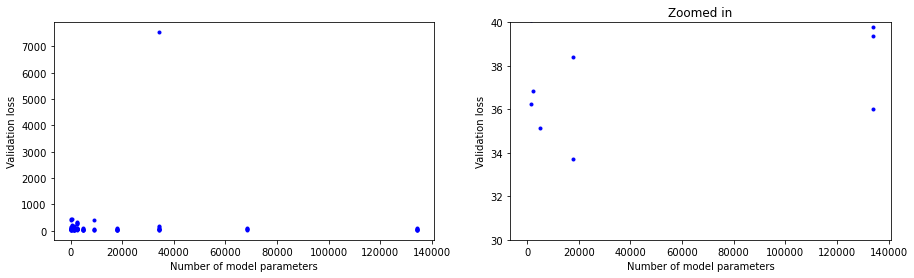

In [5]:
fig = plt.figure()
fig.set_figwidth(15)

ax = fig.add_subplot(1,2,1)
plt.figure(1, figsize = (8,8))
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.plot(model_parameters, objective, 'b.')

ax = fig.add_subplot(1,2,2)
plt.figure(1, figsize = (8,5))
plt.title('Zoomed in')
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.ylim([30,40])
plt.plot(model_parameters, objective, 'b.')

In [6]:
# Date and optimizer of the best runs

for j in range(7):
    which_file = 0
    best_index = np.argsort(objective)[j]
    for key in df.keys():
        which_file = which_file + df[key].shape[0]
        if which_file > best_index:
            print(df[key].iloc[df[key].shape[0]+best_index-which_file])
            print('Date and Optimizer: ' + key)
            break

# Which job was associated with which random number?
jobs = {292439: 29576035, 308527: 29576525, 152287: 29576523,
        132049: 29576218, 114486: 29576524}\

Trial-ID                                            5
Status                                      COMPLETED
Iteration                                           2
activation_1                                      elu
activation_2       <function lrelu at 0x2adda2427b00>
activation_3                                      NaN
activation_4                                      NaN
bn_1                                                1
bn_2                                                0
bn_3                                                1
bn_4                                                0
dropout                                      0.013119
epsilon                                           0.1
l1_reg                                       0.000822
l2_reg                                        0.00774
last_activation                                linear
lrinit                                       0.000713
model_depth                                         3
num_units                   